# ECON 570 - Final Project
## The Impact of News Source Trust on COVID-19 Risk Perception and COVID-19 Vaccination Trust
### *Virat Agrawal, Jose Alcocer, Zissis Marmarelis*

# Introduction

Media outlets play a crucial role in framing public opinion, and by extension, individual behaviors (e.g., Iyengar and Kinder 1987; Prior 2007; Iyengar et al. 2010). In the context of the United States, literature on media framing and public opinion effects have traditionally focused on general issues ranging from all things political (e.g., trust in government, domestic policies), economic (e.g., minimum wage, taxes), and social (e.g., abortion, immigration) (e.g., Sniderman and Theriault 2004; Scheufele, and Tewksbury 2007; Hetherington and Rudolph 2008; Broockman and Butler 2017). However, with the rise of the COVID-19 pandemic over the last two years, this topic has become a hot-button issue within the country, producing widely ranged views based on several characteristics such as education, urban environment, and gender (e.g., Galasso et al. 2020; Pew Research Center 2020; Rattay et al. 2021). The levels of extreme polarization witnessed in the the United States (see Bail et al. 2018) in addition to the rise of controversy over the COVID-19 pandemic creates a prime case to study the  effects of extreme-ideology news sources on individual perceptions. 

Understanding the role of news media framing public information and the impact of information sources in people's compliance with public health policy is of utmost importance. News media giants are often the conduit between government action and the public, as they interpret and distill policy information across their viewers while infusing thier unique framing and political agendas (Iyengar and Kinder 1987). While literature on media framing and the COVID-19 pandemic continues to evolve, it is still relatively scarce. A few studies have assessed the types of media frames that have been used across several countries as a result of the pandemic in addition to how media actors have used these frames to advance their political agendas (Mutua and Ong'ong'a 2020; Hubner 2021; Rooke 2021;Ebrahim 2022; Price and Harbisher 2022). 

A few others have assessed the impact of framing on behavioral measures related to COVID-19 prevention. Using 6,850 samples from survey conducted on MTurk and Prolific, (Jordan, Yoeli, and Rand 2020) investigated the impact of different types of message framing related to COVID-19 preventions - personal (don't get it), prosocial (don't spead it), and a combination of both. The study found that the prosocial messaging is more effective in encouraging people to comply with behavioral policies. Similarly, Capraro and Barcelo (2020) conducted an online experiment on 2,459 participants to identify the effect of messaging on wearing mask behavior. The experiment framed the message as - the threat of coronavirus to "you" vs "your family" and "your community" vs "your country". The study found that the framing of message as "you community" has larger effect o behavior compared to the other three framings. 

So far, no study has examined how these existing framing strategies have impacted individuals' perceptions and opinions about COVID-19 risks. As such, this paper strives to elucidate the relationship of trust in right-wing (i.e., Fox-news) or left-wing (i.e., MSNBC) news sources with the risk perception of COVID-19 infection and trust in vaccination. These news outlets each provide a specific narrative for their target audience, especially in the case of COVID-19. Further, we examine the effect of trust in social-media contacts (e.g., Facebook) on these outcomes, as previous research has suggested that social media has exacerbates polarization due to its "echo-chamber" effect (Bail et al. 2018; Barberá 2020; Cinelli et al. 2021)


# Data

We use the Understanding Coronavirus in America survey data to measure COVID-19 risk perception and trust in COVID-19 vaccine. This survey is a part of the larger Understanding America Survey (UAS), a nationally representative panel data of approximately 9,500 households in the United States, collected by the USC Center for Economic and Social Research (CESR). The understanding of the Coronavirus in America survey was collecetd in continuous waves from March, 2020 (Wave 1) until July, 2021 (Wave 29). 

For our analysis we use datasets from wave 20 (December 9, 2020 to January 6, 2021) to wave 29 (June 9, 2021 - July 21, 2021) as questions on information source (such as, FOX, MSNBC, Sociual Media) were added to the survey beginning wave 20. Wave 20 to 29 have a total of 61,055 observations, however, the final dataset includes 42,038 observations after dropping observations with non-response or missing values. The primary variables used for the analysis are - 1) Risk Perception (On a scale of 0 to 100 percent, what is the chance that you will get the coronavirus in the next three months?), 2) Likelihood to get Vaccine (How likley are you to get vaccinated for coronavirus once a vaccine is available to the public), and  3) Trust in Information Source (How much do you trust the following sorces of information about the coronavirus?).
Data was further cleaned to rescale categorical variables appropriately for the analysis. Risk perception ranges from 0 - 100, where 0 is lowest risk perception and 100 is the highest risk perception. Likelihood to get Vaccine is rescaled from 1 to 4, where 1 is unlikely, 2 is unsure, 3 is likely and 4 is vaccine received. Trust in information source is rescaled to a dummy 0 vs 1, where 0 is do not trust, and 1 is trust.

For each respondent, the survey collects information on age, gender, race, education, marital status, household income and employment type. We use these characteristics as covariates in models, given the differential impact of the COVID-19 pandemic by each of these measures.Summary statistics of variables of interest are illustrated; namely, for our outcome variables of COVID-19 risk perception and vaccine trust, as well as our explanatory variables of interest of news sources trust, along with relevant covariates mentioned. The correlation between the three differnt sources of news is also shown to illustrate the uncorrelated nature, which is coherent with our aforementioned theoretical intuition.

In [ ]:
import pandas as pd               # Pandas handles dataframes
import numpy as np                # Numpy handles lots of basic maths operations
import matplotlib.pyplot as plt   # Matplotlib for plotting
import seaborn as sns             # Seaborn for beautiful plots
from dateutil import *            # I prefer dateutil for parsing dates
import math                       # transformations
import statsmodels.formula.api as smf  # for doing statistical regression
import statsmodels.api as sm      # access to the wider statsmodels library, including R datasets
from collections import Counter   # Counter is useful for grouping and counting
import scipy

from numpy.random import randn
from sklearn.linear_model import LinearRegression
from linearmodels.panel import PanelOLS

In [ ]:
### Read in data ###

uasdata = pd.read_csv("UAS_US_panel_cleaned_v3.csv")
uasdata.head()

,uasid,wave,final_weight,gender,age,fips,maritalstatus,education,hisplatino,white,...,income,educ,epi_week,epi_year,epi_week_wave,vaccine_trust,fox_0vs1,msnbc_0vs1,socm_0vs1,covid_risk
0,160400573,20,0.783772,1,53,1,6 Never married,13 Bachelor's degree,0,1,...,4,3,50,2020,1,3,0,0,0,10.0
1,160503588,20,2.752219,0,49,1,2 Married (spouse lives elsewhere),9 High school graduate or GED,0,0,...,1,1,50,2020,1,1,0,0,0,0.0
2,191104605,20,0.789060,1,70,1,1 Married (spouse lives with me),10 Some college-no degree,0,1,...,4,2,50,2020,1,1,0,0,1,25.0
3,191104688,20,2.661497,1,66,1,1 Married (spouse lives with me),9 High school graduate or GED,0,1,...,3,1,50,2020,1,3,1,0,0,1.0
4,191104635,20,0.578720,0,40,1,1 Married (spouse lives with me),14 Master's degree,0,1,...,4,4,50,2020,1,3,0,1,0,10.0


### Summary of Variables of Interest

In [ ]:
### Summarize ###
uasdata[['epi_week_wave', 'fips', 'age', 'gender', 'white', 'black', 'asian', 'nativeamer', 'pacific', 
         'hisplatino', 'educ', 'marriage_status', 'income', 'job_type', 'vaccine_trust','covid_risk', 
         'fox_0vs1', 'msnbc_0vs1', 'socm_0vs1']].describe().T

,count,mean,std,min,25%,50%,75%,max
epi_week_wave,42038.0,13.476283,8.747229,1.0,6.0,11.0,21.0,33.0
fips,42038.0,29.488939,15.752386,1.0,17.0,29.0,42.0,56.0
age,42038.0,54.022123,15.422302,18.0,42.0,55.0,66.0,90.0
gender,42038.0,0.419930,0.493553,0.0,0.0,0.0,1.0,1.0
white,42038.0,0.876231,0.329322,0.0,1.0,1.0,1.0,1.0
black,42038.0,0.092726,0.290051,0.0,0.0,0.0,0.0,1.0
asian,42038.0,0.037276,0.189439,0.0,0.0,0.0,0.0,1.0
nativeamer,42038.0,0.034279,0.181946,0.0,0.0,0.0,0.0,1.0
pacific,42038.0,0.008944,0.094151,0.0,0.0,0.0,0.0,1.0
hisplatino,42038.0,0.061254,0.239799,0.0,0.0,0.0,0.0,1.0


### Correlation Plot for News Sources - Fox, MSNBC, Social Media

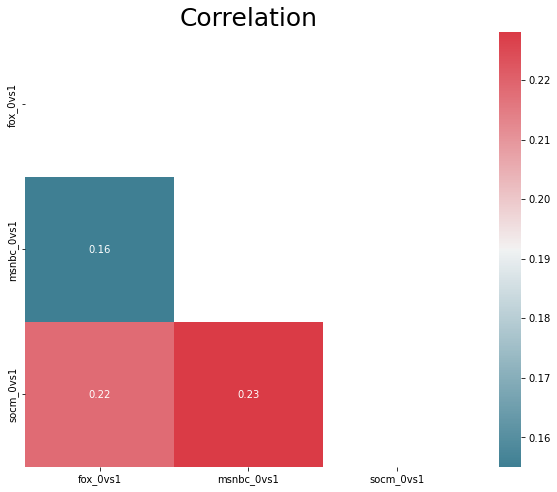

In [ ]:
### Correlation ###
# Generate a mask for the upper triangle
mask = np.zeros_like(uasdata[['fox_0vs1','msnbc_0vs1', 'socm_0vs1']].corr())
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)
#
fig = plt.figure(figsize = (10, 8))
_ = plt.title('Correlation', size = 25)
_ = sns.heatmap(uasdata[['fox_0vs1','msnbc_0vs1', 'socm_0vs1']].corr(), mask = mask, cmap = cmap, annot = True)
_ = plt.ylim((len(uasdata[['fox_0vs1','msnbc_0vs1', 'socm_0vs1']].corr()), 0)) # See bug on bottom cutoff: https://github.com/mwaskom/seaborn/issues/1773
plt.show()

# Estimation

Our analysis looks at three distinct models using ordinary least square fixed effects approach. Using trust in news sources and social-media contacts as our main explanatory variables of interest, we observe their effect on two COVID-19 risk perception outcomes: i) Risk perception ii) Trust in vaccination. We include a rich set of covariates such as gender, age, educaiton, income, race, marital status and employment type in addition to time fixed effects (week of survey wave) and state fixed effects to control for time-varying state-invariant differences and for time-invariant differences between states, respecitvely. We also illustrate the difference in our results when not including these fixed effects in Models 1A, 2A, and 3A. The exclusion of these fixed effects would render our model much less robust as it becomes prone to omitted variable bias.

Model 1: *Risk Preference = β * News Sources + Χ + δ + γ + ε

Model 2: *Trust in Vaccination = β * News Sources + Χ + δ + γ + ε

Model 3: *Trust in Vaccination = β * News Sources + α * Risk Preference + Χ + δ + γ + ε

Whereby β represent our coefficents of interest of the different news sources (and α for risk preference), Χ is a vector of covariates, δ represent time fixed effects, and γ state fixed effects, with ε as our error term.

# Model 1: Regress Covid-19 Risk Perception on Source of Information
### 1A:  No Fixed Efects | Control for Individual Characteristics 

In [ ]:
print("==================================================================================================")
print("            Model 1A - Regress Covid-19 Risk Perception on the Source of Information             " )
print("               Control for Individual Characteristics | No Fixed Efects                          " )
print("===================================================================================================")

uasdata = pd.read_csv("UAS_US_panel_cleaned_v3.csv")

result = smf.ols(formula = "covid_risk ~ fox_0vs1 + msnbc_0vs1 + socm_0vs1 + age + gender + white + black + asian + nativeamer + pacific + hisplatino + educ + income + marriage_status + job_type", data = uasdata).fit()
print(result.summary())

            Model 1A - Regress Covid-19 Risk Perception on the Source of Information             
               Control for Individual Characteristics | No Fixed Efects                          
                            OLS Regression Results                            
Dep. Variable:             covid_risk   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     119.3
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        18:30:27   Log-Likelihood:            -1.8951e+05
No. Observations:               42038   AIC:                         3.790e+05
Df Residuals:                   42022   BIC:                         3.792e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
              

### 1B:  State and Week Fixed Efects | Control for Individual Characteristics 

In [ ]:
print("==================================================================================================")
print("            Model 1B - Regress Covid-19 Risk Perception on the Source of Information             " )
print("               Control for Individual Characteristics | State and Week Fixed Efects              " )
print("===================================================================================================")

uasdata = pd.read_csv("UAS_US_panel_cleaned_v3.csv")

uasdata = uasdata.set_index(['fips', 'epi_week_wave'])

exog_vars = ['fox_0vs1', 'msnbc_0vs1', 'socm_0vs1', 'age', 'gender', 'white', 'black', 'asian', 'nativeamer', 'pacific',  'hisplatino', 'educ', 'marriage_status', 'income', 'job_type']
exog = sm.add_constant(uasdata[exog_vars])
mod = PanelOLS(uasdata.covid_risk, exog, entity_effects=True, time_effects=True)
re_res = mod.fit()
print(re_res)

            Model 1A - Regress Covid-19 Risk Perception on the Source of Information             
               Control for Individual Characteristics | State and Week Fixed Efects              
                          PanelOLS Estimation Summary                           
Dep. Variable:             covid_risk   R-squared:                        0.0371
Estimator:                   PanelOLS   R-squared (Between):              0.1259
No. Observations:               42038   R-squared (Within):               0.0371
Date:                Thu, May 05 2022   R-squared (Overall):              0.0404
Time:                        18:34:10   Log-likelihood                -1.884e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      107.75
Entities:                          51   P-value                           0.0000
Avg Obs:                       824.27   Distribution:                F(15,4

# Model 2 : Regress Covid-19 Vaccine Trust on the Source of Information
### 2A: No Fixed Efects | Control for Individual Characteristics 

In [ ]:
print("==================================================================================================")
print("            Model 2A - Regress Covid-19 Vaccine Trust on the Source of Information             " )
print("               Control for Individual Characteristics | No Fixed Efects                        " )
print("===================================================================================================")

uasdata = pd.read_csv("UAS_US_panel_cleaned_v3.csv")

result = smf.ols(formula = "vaccine_trust ~ fox_0vs1 + msnbc_0vs1 + socm_0vs1 + age + gender + white + black + asian + nativeamer + pacific + hisplatino + educ + income + marriage_status + job_type", data = uasdata).fit()
print(result.summary())

            Model 2A - Regress Covid-19 Vaccine Trust on the Source of Information             
               Control for Individual Characteristics | No Fixed Efects                        
                            OLS Regression Results                            
Dep. Variable:          vaccine_trust   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     650.1
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        18:31:34   Log-Likelihood:                -61351.
No. Observations:               42038   AIC:                         1.227e+05
Df Residuals:                   42022   BIC:                         1.229e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  

### 2B: State and Week Fixed Efects | Control for Individual Characteristics 

In [ ]:
print("==================================================================================================")
print("            Model 2B - Regress Covid-19 Vaccine Trust on the Source of Information             " )
print("               Control for Individual Characteristics | State and Week  Fixed Efects           " )
print("===================================================================================================")

uasdata = pd.read_csv("UAS_US_panel_cleaned_v3.csv")

uasdata = uasdata.set_index(['fips', 'epi_week_wave'])

exog_vars = ['fox_0vs1', 'msnbc_0vs1', 'socm_0vs1', 'age', 'gender', 'white', 'black', 'asian', 'nativeamer', 'pacific',  'hisplatino', 'educ', 'marriage_status', 'income', 'job_type']
exog = sm.add_constant(uasdata[exog_vars])
mod = PanelOLS(uasdata.vaccine_trust, exog, entity_effects=True, time_effects=True)
re_res = mod.fit()
print(re_res)

            Model 2B - Regress Covid-19 Vaccine Trust on the Source of Information             
               Control for Individual Characteristics | State and Week  Fixed Efects           
                          PanelOLS Estimation Summary                           
Dep. Variable:          vaccine_trust   R-squared:                        0.2018
Estimator:                   PanelOLS   R-squared (Between):              0.3764
No. Observations:               42038   R-squared (Within):               0.1797
Date:                Thu, May 05 2022   R-squared (Overall):              0.1881
Time:                        18:35:55   Log-likelihood                 -5.84e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      706.99
Entities:                          51   P-value                           0.0000
Avg Obs:                       824.27   Distribution:                F(15,41940

# Model 3: Regress Covid-19 Vaccine Trust on Covid-19 Risk Perception and the Source of Information
### 3A:  No Fixed Efects | Control for Individual Characteristics

In [ ]:
print("=======================================================================================================")
print("  Model 3A - Regress Covid-19 Vaccine Trust on Covid-19 Risk Perception and the Source of Information " )
print("                   Control for Individual Characteristics | No Fixed Efects                           " )
print("=======================================================================================================")

uasdata = pd.read_csv("UAS_US_panel_cleaned_v3.csv")
result = smf.ols(formula = "vaccine_trust ~ covid_risk + fox_0vs1 + msnbc_0vs1 + socm_0vs1 + age + gender + white + black + asian + nativeamer + pacific + hisplatino + educ + income + marriage_status + job_type", data = uasdata).fit()
print(result.summary())

  Model 3A - Regress Covid-19 Vaccine Trust on Covid-19 Risk Perception and the Source of Information 
                   Control for Individual Characteristics | No Fixed Efects                           
                            OLS Regression Results                            
Dep. Variable:          vaccine_trust   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     620.1
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        18:44:53   Log-Likelihood:                -61282.
No. Observations:               42038   AIC:                         1.226e+05
Df Residuals:                   42021   BIC:                         1.227e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
    

### 3B:  State and Week Fixed Efects | Control for Individual Characteristics

In [ ]:
print("=======================================================================================================")
print("  Model 3B - Regress Covid-19 Vaccine Trust on Covid-19 Risk Perception and the Source of Information " )
print("                   Control for Individual Characteristics | State and Week Fixed Efects                           " )
print("=======================================================================================================")

uasdata = pd.read_csv("UAS_US_panel_cleaned_v3.csv")

uasdata = uasdata.set_index(['fips', 'epi_week_wave'])

exog_vars = ['covid_risk', 'fox_0vs1', 'msnbc_0vs1', 'socm_0vs1', 'age', 'gender', 'white', 'black', 'asian', 'nativeamer', 'pacific',  'hisplatino', 'educ', 'marriage_status', 'income', 'job_type']
exog = sm.add_constant(uasdata[exog_vars])
mod = PanelOLS(uasdata.vaccine_trust, exog, entity_effects=True, time_effects=True)
re_res = mod.fit()
print(re_res)



  Model 3B - Regress Covid-19 Vaccine Trust on Covid-19 Risk Perception and the Source of Information 
                   Control for Individual Characteristics | State and Week Fixed Efects                           


/Users/viratagrawal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                          PanelOLS Estimation Summary                           
Dep. Variable:          vaccine_trust   R-squared:                        0.2020
Estimator:                   PanelOLS   R-squared (Between):              0.3753
No. Observations:               42038   R-squared (Within):               0.1782
Date:                Thu, May 05 2022   R-squared (Overall):              0.1866
Time:                        18:39:53   Log-likelihood                 -5.84e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      663.47
Entities:                          51   P-value                           0.0000
Avg Obs:                       824.27   Distribution:                F(16,41939)
Min Obs:                       20.000                                           
Max Obs:                       2718.0   F-statistic (robust):             663.47
                            

# Results

Our results demonstrate that trust in news sources plays a signficant role in influencing risk perception of COVID-19. Individuals who trust MSNBC are signficantly more likely to perceive themselves as being at risk for COVID-19 infection (3.1403, 95% C.I. 2.6938 to 3.5869), likely due to taking the viral effects more seriously. On the other hand, trusting Fox News significantly decreases this risk perception (-0.9241, 95% C.I. -1.3610 to -0.4872), mirroring anecdotal messages conveyed through these news sources. Our results convey that individuals who place a higher degree of trust in their social media contacts are also less likely to perceive themselves as vulnerable to COVID-19 infection (-1.0057, 95% C.I. -1.4374 to -0.5740), perhaps illustrating either the nature of social media as playing down the seriousness of COVID-19, or simply suggesting that those who place such great trust in their contacts are less likely to perceive it as a serious disease to themselves. The "echo-chambers" promoted through social media likely exacerbate any misinformation prevalent on social media.

In terms of vaccination trust, we observe similar trends. Specifically, trust in MSNBC yields signficantly higher trust in vaccination (0.6918, 95% C.I. 0.6715 to 0.7120), while trust in Fox News results in lower trust in vaccination (-0.0378, 95% C.I. -0.0576 to -0.0179). Moreover, the results also indicate that the trust in social media information is associated with lower trust in vaccine (-0.1098, 95% C.I. -0.1294 to -0.0902). This is in line with the messages communicated by different news channels. Interestingly, in both models, the magnitude of positive trust with MSNBC is substantially greater than the negative magnitude of Fox News and social media contacts distrust. This indicates a general homogneity of views of the population who trust sources such as MSNBC, with regards to vaccination and the nature of COVID-19. 

Our final model includes risk perception (our outcome for model 1) as an additional explanatory variable to elucidate this relationship between vaccination trust and news sources. While the coefficients for news sources remain virtually unchanged, we surpsingly see almost zero effect (0.0007, 95% C.I. 0.0002 to 0.0011) of risk perception on vaccination trust. This indicates that higher risk perception towards COVID-19 doesn't necessarily mean higher trust in vaccine. Individual can have higher risk perception, but at the same time they can have less trust in vaccine due to multiple reasons, such as hastened approval process, side-effects worry, or religious beliefs. For example, as of March 2022, in China over 40% of people who are older than 80 years were unvaccinated (The Economist 2022), despite the fact that China has very stringent COVID-19 policies and citizens in China have higher pro-COVID-19 policy tendencies compared to people in Europe (Zhao and Knobel 2021). 

# Conclusion

This study demonstrates the signficant effect of news source information trust on COVID-19 viewpoints. Across models and specifications, we are able to observe the stark divide of viewpoints recently experienced in the US mirroring severe polarization through trust in different news sources. MSNBC and Fox News stand at opposite ends of the liberal-conservation spectrum, and as such, the vivid differences in COVID-19 views (i.e., perception of risk of infection and vaccination trust) are expected and intuitive, as COVID-19 has become heavily politicized. We interestingly observe that individuals who highly trust their social media contacts have more in common with those who trust Fox News, as they are more likely to distrust vaccination and less likely to perceive COVID-19 infection as risky. Future analysis should focus on the mechanism (e.g., is it education related?) for why we observe a decreased trust of vaccination from individuals who trust their social media contacts more, as this suggests social media is likely to disseminate misinformation. Further, this study could be complemented to understand the relationship between vaccination and news source trust by utilizing vaccination elgibility as a fruitful instrumental variable for vaccination.

Ultimately, the study shows that a message is perceived differently by different people, depending on how the message is framed. Therefore, bringing in some checks and balances on News broadcasting and social media in order to curb misinformation could potentially bring paradigmatic changes in the effectiveness of public policy, especially during public health crises.   


# References


Barberá, Pablo. (2020). Social Media, Echo Chambers, and Political Polarization. In N. Persily & J. Tucker (Eds.), Social Media and Democracy: The State of the Field, Prospects for Reform (SSRC Anxieties of Democracy, pp. 34-55). Cambridge: Cambridge University Press.

Capraro, Valerio, and Helene Barcelo. 2020. "The effect of messaging and gender on intentions to wear a face covering to slow down COVID-19 transmission." arXiv:2005.05467 [physics, q-bio], May. http://arxiv.org/abs/2005.05467

Christopher A. Bail, Lisa P. Argyle, Taylor W. Brown, John P. Bumpus, Haohan Chen, M. B. Fallin Hunzaker, Jaemin Lee, Marcus Mann, Friedolin Merhout, and Alexander Volfovsky. 2018. “Exposure to opposing views on social media can increase political polarization.” Proceedings of the National Academy of Sciences Sep 2018, 115 (37) 92169221; DOI: 10.1073/pnas.1804840115

D. A. Scheufele, and D. Tewksbury. 2007. Framing, Agenda Setting, and Priming:
The Evolution of Three Media Effects Models. Journal of Communication 57 (1): 9-20.

D. E. Broockman, and Butler, D.M. 2017. The Causal Effects of Elite Position-
Taking on Voter Attitudes: Field Experiments with Elite Communication. American
Journal of Political Science 61 (1): 208-22.

Ebrahim, S. "The corona chronicles: Framing analysis of online news headlines of the COVID-19 pandemic in Italy, USA and South Africa". Health SA = SA Gesondheid, 27, 1683 (2022). https://doi.org/10.4102/hsag.v27i0.1683

Galasso Vincenzo, Pons Vincent, Paola Profeta, Becher Michael, Brouard Sylvain, Foucault Martial. Gender differences in COVID-19 attitudes and behavior: panel evidence from eight countries. Proc. Natl. Acad. Sci. Unit. States Am. 2020;117(44):27285–27291. doi: 10.1073/pnas.2012520117.

Hubner, Austin. "How did we get here? A framing and source analysis of early COVID-19 media coverage". Communication Research Reports, 38:2, 112-120 (2021). DOI: 10.1080/08824096.2021.1894112

Jordan, Jillian, Erez Yoeli, and David Rand. 2020. "Don't Get It or Don't Spread It: Comparing Self-Interested versus Prosocial Motivations for COVID-19 Prevention Behaviors." PsyArXiv. https://doi.org/10.31234/osf.io/yuq7x

Marc Hetherington, and Thomas Rudolph. 2008. Priming, Performance, and the
Dynamics of Political Trust. Journal of Politics 70: 498-512.

Mutua, Sylvia Ndanu, and Daniel Oloo Ong'ong'a. "Online News Media Framing of COVID-19 Pandemic: Probing the Initial Phases of the Disease Outbreak in International Media". European Journal of Interactive Multimedia and Education 2020 1 no. 2 (2020): e02006. https://doi.org/10.30935/ejimed/8402

Paul M. Sniderman, and Sean M. Theriault. 2004. The Structure of Political
Argument and the Logic of Issue Framing. In Studies in Public Opinion: Attitudes, Nonattitudes, Measurement Error, and Change, eds. Willem E. Saris and Paul M. Sniderman. Princeton: Princeton University Press.

Pew Research Center, March, 2020, “Worries About Coronavirus Surge, as Most Americans Expect a Recession – or Worse”

Prior, Markus. (2007). Post-Broadcast Democracy. New York: Cambridge University
Press.

Rattay P, Michalski N, Domanska OM, Kaltwasser A, De Bock F, et al. (2021). Differences in risk perception, knowledge and protective behaviour regarding COVID-19 by education level among women and men in Germany. Results from the COVID-19 Snapshot Monitoring (COSMO) study. PLOS ONE 16(5): e0251694. https://doi.org/10.1371/journal.pone.0251694

Rooke, Martin. “Alternative Media Framing of COVID-19 Risks.” Current Sociology 69, no. 4 (July 2021): 584–602. https://doi.org/10.1177/00113921211006115.

Shanto Iyengar and Donald Kinder. 1987. News That Matters. Chicago: University of Chicago Press.

Shanto Iyengar et al., 2010. Cross-National versus Individual-Level Differences in Political Information: A Media Systems Perspective. J of Elections, Public Opinion and Parties 20 (3): 291-309.

The Economist. n.d. "Why so many elderly Chinese are unvaccinated." Accessed May 5, 2022. https://www.economist.com/china/2022/04/02/why-so-many-elderly-chinese-are-unvaccinated

Zhao, Xiang, and Phil Knobel. 2021. "Face Mask Wearing during the COVID-19 Pandemic: Comparing Perceptions in China and Three European Countries." Translational Behavioral Medicine 11(6): 1199-1204 https://doi.org/10.1093/tbm/ibab043
